## Name of the Project : Loan Prediction

### Business Problem :

The banks would like to know the status of their loans whether the loans are paid off, in collection, new customer yet to payoff, or paid off after the collection efforts so that they can analyse the results and take the proper business improvement plans.

### Description of the dataset:

This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection.

<b>File Format :</b>csv
    
<b>Rows :</b>500
    
<b>Columns :</b>11

<b>Target Variable :</b>Loan_status

### Attribute Information :

<b>Loan_id :</b> A unique loan number assigned to each loan customers.

<b>Loan_status :</b> Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

<b>Principal :</b> Basic principal loan amount at the origination

<b>Terms :</b> Can be weekly (7 days), biweekly, and monthly payoff schedule

<b>Effective_date :</b> When the loan got originated and took effects

<b>Due_date :</b> Since it’s one-time payoff schedule, each loan has one single due date

<b>Paidoff_time :</b> The actual time a customer pays off the loan

</b>Pastdue_days :</b> How many days a loan has been past due

<b>Age :</b> Age of the customer
    
<b>Education :</b> Education details of the customer
    
<b>Gender :</b> Gender of the Customer

### Objective : 

To build a model which predicts whether the  loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts.

### Constraints :

1.Acceptable with little latency.

2.Need good Exploratory Data Analysis.

3.The cost of a mis-classification can be very high

### Type of Machine Learning Problem :

Muliticlass Classification

### Performace Metrics :

Try with as many as possible metrics.

1.Accuracy

2.ROC

3.logloss

4.F1 score

### Train and Test Construction :

We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.

### Let us start the model development!!

#### Importing necessary libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data from csv file

data=pd.read_csv("D:\Projects\Loan_Prediction\Loan payments data.csv")

### Exploratory Data Analysis(EDA) :

In [3]:
# Shape of the dataframe

data.shape

(500, 11)

In [4]:
# showing the 1st 5 records of the dataframe

data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


#### Checking for Number of NaN values in each column:

In [5]:
data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

<p> From the above details,we can see that only 2 columns : <b>paid_off_time</b> and <b>past_due_dates</b> have NaN values and remaining columns don't have NaN values.</p>

#### Calculating the % of NaN values in the dataset :

In [6]:
NaN_values=(data.isnull().sum().sum()/(data.shape[0]))*100
print( "The % of NaN values is :",(100-NaN_values))

The % of NaN values is : 20.0


#### Checking the data types of the columns :

In [7]:
data.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

From the above details,we can see that the date columns are object and remaining columns have proper data types.We can change the date columns to date data type.

#### Converting the date columns to datetime data type :

In [8]:
data['effective_date']=pd.to_datetime(data['effective_date'])
data['due_date']=pd.to_datetime(data['due_date'])
data['paid_off_time']=pd.to_datetime(data['paid_off_time'])

#### Checking the data types after converting to datetime :

In [9]:
data.dtypes

Loan_ID                   object
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
paid_off_time     datetime64[ns]
past_due_days            float64
age                        int64
education                 object
Gender                    object
dtype: object

In [10]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female


#### Checking the Target Class count of the dataset :

In [11]:
data['loan_status'].value_counts()

PAIDOFF               300
COLLECTION_PAIDOFF    100
COLLECTION            100
Name: loan_status, dtype: int64

From the above details,we can see that the dataset is partially Imbalanced.

#### Checking of unique values of the columns :

In [12]:
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [13]:
data['Principal'].unique()

array([1000,  300,  800,  900,  700,  500], dtype=int64)

In [14]:
data['terms'].unique()

array([30, 15,  7], dtype=int64)

In [15]:
data['past_due_days'].unique()

array([nan, 76., 61., 75., 60., 59., 74., 29., 44., 58., 73., 28.,  2.,
        4., 13.,  5.,  3., 12., 27.,  1., 25., 24., 36.,  7., 14., 23.,
        6., 38., 19., 52., 51.,  9., 56.,  8.])

In [16]:
data['age'].unique()

array([45, 50, 33, 27, 28, 35, 29, 36, 26, 39, 40, 32, 43, 25, 34, 31, 37,
       24, 21, 30, 22, 44, 46, 38, 23, 20, 47, 42, 19, 51, 41, 18, 49],
      dtype=int64)

In [17]:
data['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

In [18]:
data['Gender'].unique()

array(['male', 'female'], dtype=object)

### Data Prerpocessing

#### Handling NaN values :

In [19]:
data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [20]:
data['paid_off_time']=data['paid_off_time'].fillna(0)
data['past_due_days']=data['past_due_days'].fillna(0)

#### data after handling NaN values :

In [21]:
data.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

#### Converting past_due_days from float to int :

In [22]:
data.dtypes

Loan_ID                   object
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
paid_off_time             object
past_due_days            float64
age                        int64
education                 object
Gender                    object
dtype: object

In [23]:
data['past_due_days']=data['past_due_days'].astype('int')
data.dtypes

Loan_ID                   object
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
paid_off_time             object
past_due_days              int32
age                        int64
education                 object
Gender                    object
dtype: object

In [24]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,0,28,college,female


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null datetime64[ns]
due_date          500 non-null datetime64[ns]
paid_off_time     500 non-null object
past_due_days     500 non-null int32
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: datetime64[ns](2), int32(1), int64(3), object(5)
memory usage: 41.1+ KB


#### Describing the dataset :

In [26]:
data.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,500.000000,500.000000
mean,943.200000,22.824000,14.404000,31.116000
std,115.240274,8.000064,25.614312,6.084784
min,300.000000,7.000000,0.000000,18.000000
25%,1000.000000,15.000000,0.000000,27.000000
50%,1000.000000,30.000000,0.000000,30.000000
75%,1000.000000,30.000000,12.000000,35.000000
max,1000.000000,30.000000,76.000000,51.000000


### Data Visualization :

['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


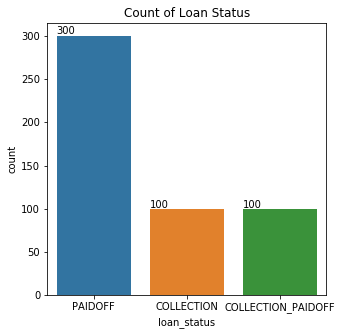

In [27]:
print(data['loan_status'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['loan_status'])
ax.set_title("Count of Loan Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

From the above plot,we can see that PAIDOFF count is more than other 2.

['High School or Below' 'Bechalor' 'college' 'Master or Above']


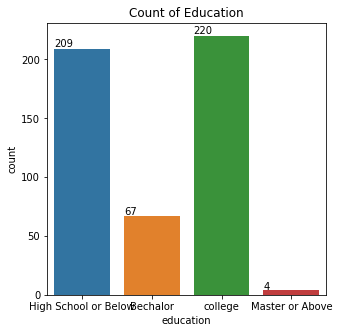

In [28]:
print(data['education'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['education'])
ax.set_title("Count of Education")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['male' 'female']


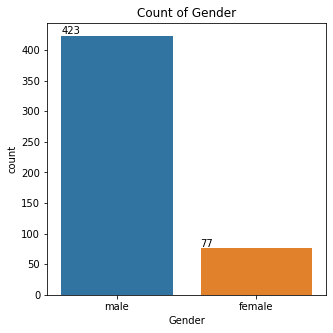

In [29]:
print(data['Gender'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Gender'])
ax.set_title("Count of Gender")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

From the above plot,we can see that there are many male applicants than female.

#### Group by Analysis of data

In [30]:
print("Group by loan_status\n")
print(data.groupby('loan_status')['Principal'].value_counts()) 

Group by loan_status

loan_status         Principal
COLLECTION          1000          77
                    800           23
COLLECTION_PAIDOFF  1000          80
                    800           19
                    500            1
PAIDOFF             1000         220
                    800           69
                    300            6
                    500            2
                    900            2
                    700            1
Name: Principal, dtype: int64


In [31]:
print("Group by loan_status with  education\n")
print(data.groupby('loan_status')['education'].value_counts()) 

Group by loan_status with  education

loan_status         education           
COLLECTION          High School or Below     49
                    college                  39
                    Bechalor                 11
                    Master or Above           1
COLLECTION_PAIDOFF  college                  48
                    High School or Below     37
                    Bechalor                 15
PAIDOFF             college                 133
                    High School or Below    123
                    Bechalor                 41
                    Master or Above           3
Name: education, dtype: int64


In [32]:
print("Group  by loan_status with Gender")
print(data.groupby('loan_status')['Gender'].value_counts())

Group  by loan_status with Gender
loan_status         Gender
COLLECTION          male       90
                    female     10
COLLECTION_PAIDOFF  male       86
                    female     14
PAIDOFF             male      247
                    female     53
Name: Gender, dtype: int64


In [33]:
print("Group by loan_status with Principal amount\n")
print(data.groupby('loan_status')['Principal'].sum())

Group by loan_status with Principal amount

loan_status
COLLECTION             95400
COLLECTION_PAIDOFF     95700
PAIDOFF               280500
Name: Principal, dtype: int64


In [34]:
print("Group by terms with Principal sum\n")
print(data.groupby('terms')['Principal'].sum())

Group by terms with Principal sum

terms
7      15800
15    185000
30    270800
Name: Principal, dtype: int64


In [35]:
print('group by education in Data with age \n')
print(data.groupby('education')['age'].count())

group by education in Data with age 

education
Bechalor                 67
High School or Below    209
Master or Above           4
college                 220
Name: age, dtype: int64


In [36]:
print('group by education in Data and sum of the Principle\n')
print(data.groupby('education')['Principal'].sum())

group by education in Data and sum of the Principle

education
Bechalor                 63300
High School or Below    198800
Master or Above           2400
college                 207100
Name: Principal, dtype: int64


In [37]:
print('Gender group by education in Data\n')
print(data.groupby('education')['Gender'].value_counts())

Gender group by education in Data

education             Gender
Bechalor              male       54
                      female     13
High School or Below  male      178
                      female     31
Master or Above       male        4
college               male      187
                      female     33
Name: Gender, dtype: int64


In [38]:
print('Gender and Education group by sum Principal in Data\n')
print(data.groupby(['education','Gender'])['Principal'].sum())

Gender and Education group by sum Principal in Data

education             Gender
Bechalor              female     12400
                      male       50900
High School or Below  female     29400
                      male      169400
Master or Above       male        2400
college               female     31000
                      male      176100
Name: Principal, dtype: int64


In [39]:
print('Gender group by Principal in Data\n')
print(data.groupby('Gender')['Principal'].sum())

Gender group by Principal in Data

Gender
female     72800
male      398800
Name: Principal, dtype: int64


#### Data Visualization : countplot

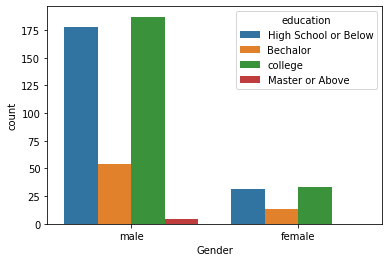

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(data['Gender'],hue=data['education'])
plt.show()

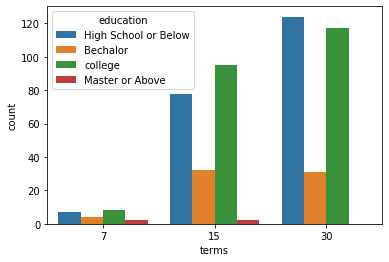

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(data['terms'],hue=data['education'])
plt.show()

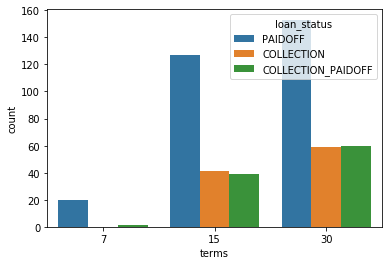

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(data['terms'],hue=data['loan_status'])
plt.show()

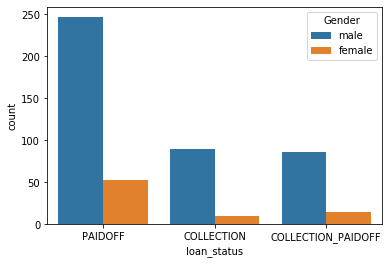

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(data['loan_status'],hue=data['Gender'])
plt.show()

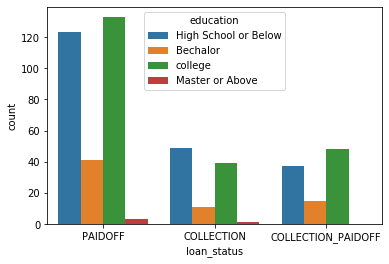

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data['loan_status'],hue=data['education'])
plt.show()

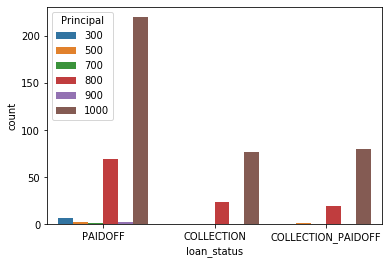

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(data['loan_status'],hue=data['Principal'])
plt.show()

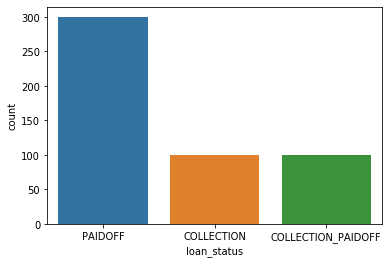

In [46]:
sns.countplot(data['loan_status'])
plt.show()

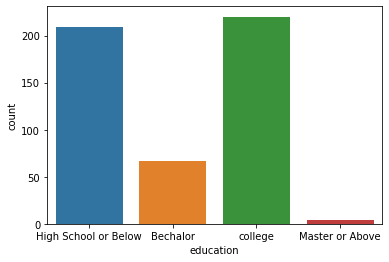

In [47]:
sns.countplot(data['education'])
plt.show()

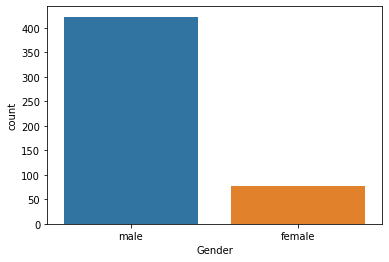

In [48]:
sns.countplot(data['Gender'])
plt.show()

#### Data Visualization : Boxplot

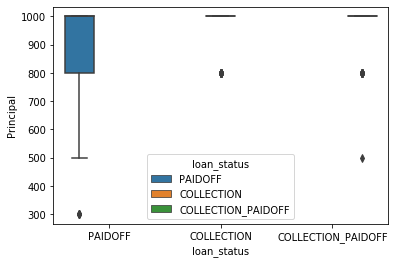

In [49]:
sns.boxplot(x='loan_status', y='Principal', data=data, hue='loan_status')
plt.show()

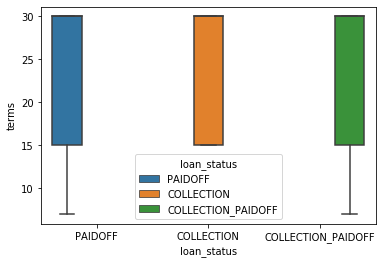

In [50]:
sns.boxplot(x='loan_status', y='terms', data=data, hue='loan_status')
plt.show()

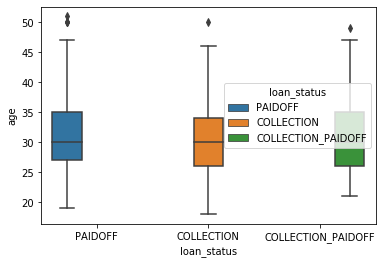

In [51]:
sns.boxplot(x='loan_status', y='age', data=data, hue='loan_status')
plt.show()

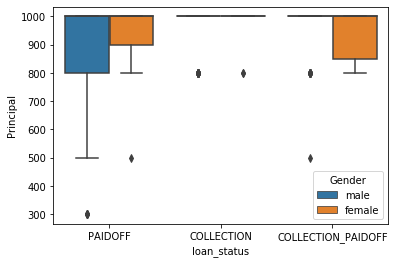

In [52]:
sns.boxplot(x='loan_status', y='Principal', data=data, hue='Gender')
plt.show()

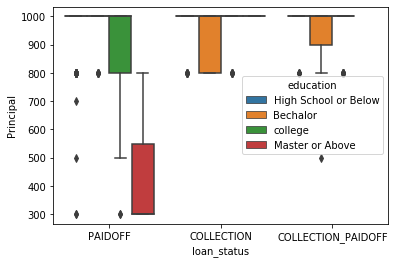

In [53]:
sns.boxplot(x='loan_status', y='Principal', data=data, hue='education')
plt.show()

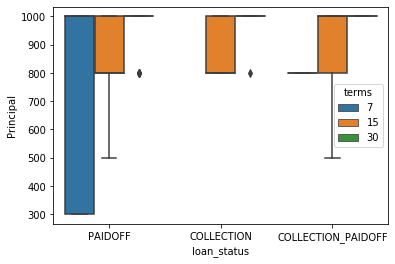

In [54]:
sns.boxplot(x='loan_status', y='Principal', data=data, hue='terms')
plt.show()

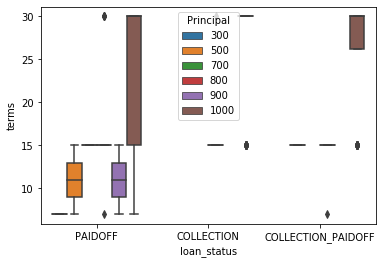

In [55]:
sns.boxplot(x='loan_status', y='terms', data=data, hue='Principal')
plt.show()

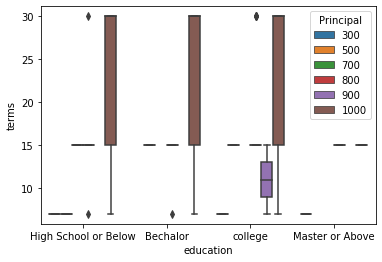

In [56]:
sns.boxplot(x='education', y='terms', data=data, hue='Principal')
plt.show()

#### Data visualization : kedplot

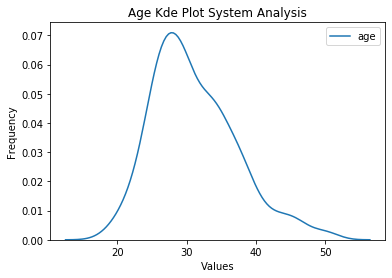

In [57]:
sns.kdeplot(data['age'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age Kde Plot System Analysis')
plt.show()

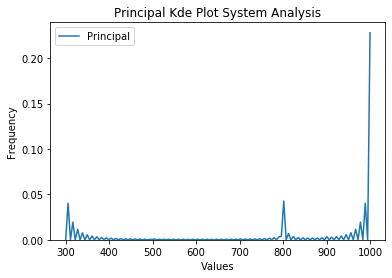

In [58]:
sns.kdeplot(data['Principal'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Principal Kde Plot System Analysis')
plt.show()

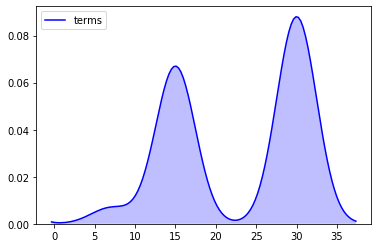

In [59]:
sns.kdeplot(data['terms'],shade=True,color='b')
plt.show()

#### Data Visualization :violin plot

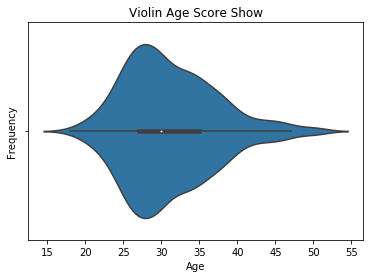

In [60]:
sns.violinplot(data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Violin Age Score Show')
plt.show()

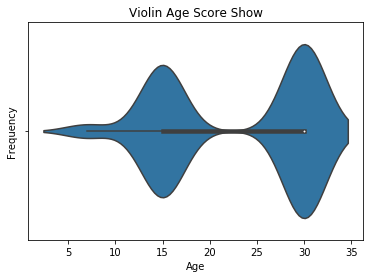

In [61]:
sns.violinplot(data['terms'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Violin Age Score Show')
plt.show()

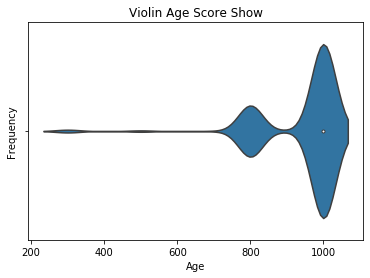

In [62]:
sns.violinplot(data['Principal'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Violin Age Score Show')
plt.show()

### Data Preprocessing :

#### Removing unnecessary columns from the dataframe 

In [63]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,0,28,college,female


In [64]:
data.drop(['Loan_ID','effective_date','due_date','paid_off_time'],axis=1,inplace=True)

In [65]:
data.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,0,45,High School or Below,male
1,PAIDOFF,1000,30,0,50,Bechalor,female
2,PAIDOFF,1000,30,0,33,Bechalor,female
3,PAIDOFF,1000,15,0,27,college,male
4,PAIDOFF,1000,30,0,28,college,female


#### Converting the categorical data into numerical 

In [66]:
data['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

In [67]:
data['education']=data['education'].map({'High School or Below':1,'college':2,'Bechalor':3,'Master or Above':4})
data['Gender']=data['Gender'].map({'male':1,'female':0})

In [68]:
data.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,0,45,1,1
1,PAIDOFF,1000,30,0,50,3,0
2,PAIDOFF,1000,30,0,33,3,0
3,PAIDOFF,1000,15,0,27,2,1
4,PAIDOFF,1000,30,0,28,2,0


#### Separating the data into Features and Labels

In [69]:
Features=(data.drop(['loan_status'],axis=1)).values # Converting to array
Labels=data['loan_status'].values # Converting to array

#### Splitting the data into train,test sets

In [70]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(Features, Labels, test_size=0.2,random_state=1)


#### Printing the shape of the train and test data

In [71]:
# Shape of the Training and Test data

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 6) (400,)
Test set: (100, 6) (100,)


## Building KNN model :

### Hyperparameter tuning to find best k value using elbow method

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# creating odd list of K for KNN
neighbors = list(range(1,31, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

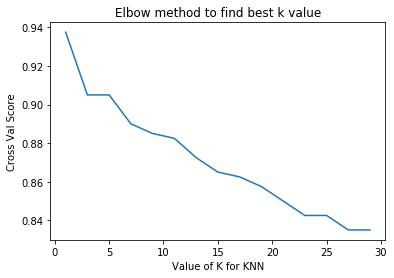

In [73]:
# Plotting the elbow method graph

plt.plot(neighbors, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Val Score')
plt.title("Elbow method to find best k value")
plt.show()

From the above plot,we can see that the best k value is 3.

### Scaling the  data before applying KNN 

Since KNN is distance based algorithm,we need to scale the data before applying KNN.

In [74]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

## Building KNN model with best k value:3

In [75]:
KNN = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
KNN.fit(X_train_std, y_train)#fitting the model
y_train_pred=KNN.predict(X_train_std)
y_test_pred=KNN.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.9
The Test Accuracy is : 0.81


### Plotting Confusion Matrix

In [76]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

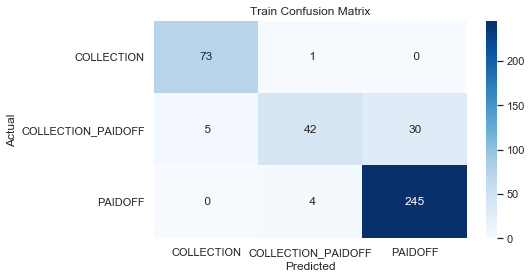

In [77]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

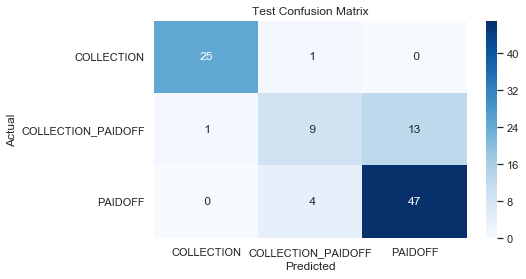

In [78]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

### Calculating f1 score

In [79]:
f1_score_train=f1_score(y_train,y_train_pred,average=None)
f1_score_test=f1_score(y_test,y_test_pred,average=None)
print("Training F1_score is :",f1_score_train)
print("Testing F1_score is :",f1_score_test)

Training F1_score is : [0.96052632 0.67741935 0.9351145 ]
Testing F1_score is : [0.96153846 0.48648649 0.84684685]


#### Saving the model for future purpose :

In [80]:
from sklearn.externals import joblib
joblib.dump(KNN,'KNN.pkl')

['KNN.pkl']

## Building Logistic Regression model

### Hyperparameter tuning using Randomizedseachcv :

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l1',class_weight='balanced',random_state=2,n_jobs=-1,solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
Random_cv=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=100,scoring='accuracy',cv=10,random_state=3,n_jobs=-1)
Log_Randomecv=Random_cv.fit(X_train_std,y_train)

#### Finding best parameters

In [82]:
Log_Randomecv.best_params_

{'C': 100}

In [83]:
Log_Randomecv.best_estimator_

LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l1',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
Log_Randomecv.best_score_

0.9649999999999999

### Building Logistic Regression with best C valued using L1 regularization 

In [85]:
log=LogisticRegression(C=100,penalty='l1',class_weight='balanced',random_state=4,n_jobs=-1,solver='liblinear')
#Fitting the model
log.fit(X_train_std,y_train)
y_train_pred=log.predict(X_train_std)
y_test_pred=log.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.9775
The Test Accuracy is : 0.97


## Building Logistic Regression using L2 regularization

### Hyperparameter tuning using Randomizedseachcv  :

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l2',class_weight='balanced',random_state=5,n_jobs=-1)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
Random_cv_l2=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=100,scoring='accuracy',cv=10,random_state=5,n_jobs=-1)
Log_Randomecv_l2=Random_cv.fit(X_train_std,y_train)

#### Finding best parameters :

In [87]:
Log_Randomecv_l2.best_estimator_

LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l1',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Building Logistic Regression with best C valued using L2 regularization :

In [88]:
log=LogisticRegression(C=100,penalty='l2',class_weight='balanced',random_state=5,n_jobs=-1)
#Fitting the model
log.fit(X_train_std,y_train)
y_train_pred_l2=log.predict(X_train_std)
y_test_pred_l2=log.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.9775
The Test Accuracy is : 0.97


### Plotting Confusion Matrices :

In [89]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix for L1 regularization :

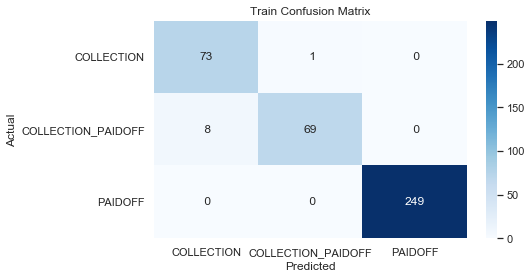

In [90]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix for L1 regularization :

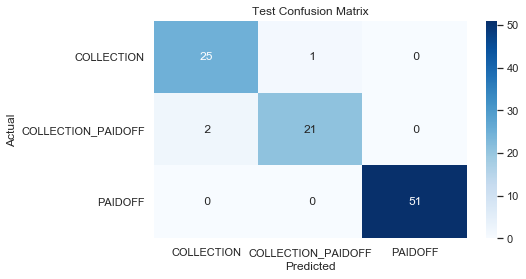

In [91]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

#### Train Confusion Matrix for L2 regularization :

In [92]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_l2)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_l2)
df_Train_l2=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test_l2=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

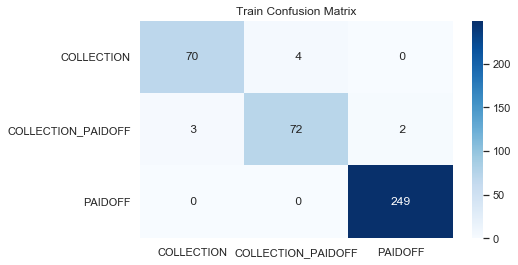

In [93]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train_l2, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix for L2 regularization :

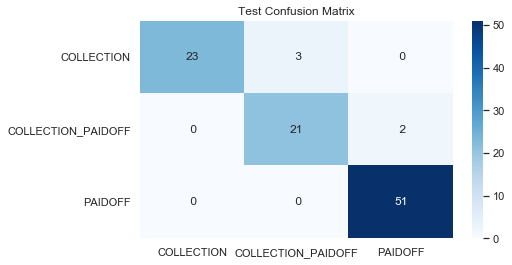

In [94]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test_l2, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

#### Fidning F1_score for L1 regularization :

In [95]:
f1_score_train=f1_score(y_train,y_train_pred,average=None)
f1_score_test=f1_score(y_test,y_test_pred,average=None)
print("Training F1_score is :",f1_score_train)
print("Testing F1_score is :",f1_score_test)

Training F1_score is : [0.94193548 0.93877551 1.        ]
Testing F1_score is : [0.94339623 0.93333333 1.        ]


#### Fidning F1_score for L2 regularization :

In [96]:
f1_score_train=f1_score(y_train,y_train_pred_l2,average=None)
f1_score_test=f1_score(y_test,y_test_pred_l2,average=None)
print("Training F1_score is :",f1_score_train)
print("Testing F1_score is :",f1_score_test)

Training F1_score is : [0.95238095 0.94117647 0.996     ]
Testing F1_score is : [0.93877551 0.89361702 0.98076923]


#### Saving the model for future purpose

In [97]:
joblib.dump(log,'Logistic_Regression.pkl')

['Logistic_Regression.pkl']

## Building Decesion Tree model

### Hyperparameter tuning using Randomizedcv 

In [98]:
from sklearn.model_selection import RandomizedSearchCV
# Assigning values to the parameters
depth=[5, 10, 50, 100, 500]
min_samples_split=[5,10,20,30,40,50]
criterion=["gini", "entropy"]
params_grid=dict(max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)

In [99]:
# Estimator

from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(class_weight='balanced',random_state=4)

In [100]:
# Building RandomizedsSearchCV

DT_RandomCV=RandomizedSearchCV(DT,params_grid,cv=10,n_iter=100,scoring='accuracy',n_jobs=-1)
DT_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=4,
      

#### Finding best parameters :

In [101]:
DT_RandomCV.best_params_

{'min_samples_split': 5, 'max_depth': 5, 'criterion': 'gini'}

### Building Decision Tree model using best parameters 

In [102]:
DT_clf=DecisionTreeClassifier(min_samples_split=5,max_depth=5,criterion='gini',random_state=5,class_weight='balanced')
DT_clf.fit(X_train,y_train)
y_pred_train_DT=DT_clf.predict(X_train)
y_pred_test_DT=DT_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_pred_train_DT))
print("The Test Accuracy is :",accuracy_score(y_test,y_pred_test_DT))

The Training Accuracy is : 1.0
The Test Accuracy is : 0.96


From the results,we can see that the model is overfitted.To aovid overfitting,we can make the model bit complex and build again as below.

#### Making the model bit complx to avoid overfitting

In [103]:
DT_clf=DecisionTreeClassifier(min_samples_split=10,max_depth=50,min_samples_leaf=2,max_features='sqrt',criterion='gini',random_state=6,class_weight='balanced')
DT_clf.fit(X_train,y_train)
y_pred_train_DT=DT_clf.predict(X_train)
y_pred_test_DT=DT_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_pred_train_DT))
print("The Test Accuracy is :",accuracy_score(y_test,y_pred_test_DT))

The Training Accuracy is : 0.9725
The Test Accuracy is : 0.95


### Plotting Confusion Matrices

In [104]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_pred_train_DT)
Test_Confusion_Matrix=confusion_matrix(y_test,y_pred_test_DT)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix :

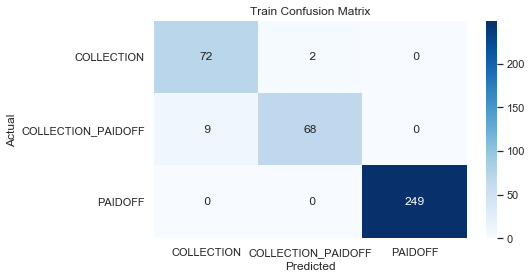

In [105]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix :

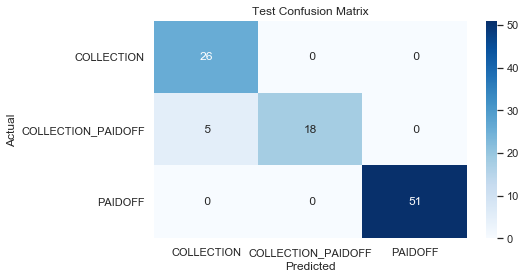

In [106]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

#### Fidning F1_score for L2 regularization :

In [107]:
f1_score_train=f1_score(y_train,y_train_pred,average=None)
f1_score_test=f1_score(y_test,y_test_pred,average=None)
print("Training F1_score is :",f1_score_train)
print("Testing F1_score is :",f1_score_test)

Training F1_score is : [0.94193548 0.93877551 1.        ]
Testing F1_score is : [0.94339623 0.93333333 1.        ]


#### Saving the model for future purpose 

In [108]:
joblib.dump(DT_clf,'Decision_Tree.pkl')

['Decision_Tree.pkl']

## Building Random Forest model

### Hyperparameter tuning using Randomizedsearchcv

In [109]:
# Assigning values to the parameters

depth=[5, 10, 50, 100, 500]
min_samples_split=[5,10,20,30,40,50]
estimators=[50,100,150,200,250,300,350,400,450,500,600,700]
criterion=["gini", "entropy"]
params_grid=dict(n_estimators=estimators,max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)
params_grid

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700],
 'max_depth': [5, 10, 50, 100, 500],
 'min_samples_split': [5, 10, 20, 30, 40, 50],
 'criterion': ['gini', 'entropy']}

In [110]:
# Estimator

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(class_weight='balanced',random_state=2,n_jobs=-1)

In [111]:
# Building RandomizedsSearchCV

RF_RandomCV=RandomizedSearchCV(RF,params_grid,cv=10,scoring='accuracy',n_jobs=-1)
RF_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
        

#### Finding best parameters :

In [112]:
RF_RandomCV.best_params_

{'n_estimators': 450,
 'min_samples_split': 5,
 'max_depth': 50,
 'criterion': 'entropy'}

### Building Random Forest model using best parameters :

In [113]:
RF_clf=RandomForestClassifier(n_estimators=350,min_samples_split=5,max_depth=50,criterion='gini',class_weight='balanced',random_state=3,n_jobs=-1)
RF_clf.fit(X_train,y_train)
y_train_pred_RF=RF_clf.predict(X_train)
y_test_pred_RF=RF_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_RF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_RF))

The Training Accuracy is : 1.0
The Test Accuracy is : 0.96


From the above results,we can see that the model is overfitted.To avoid overfitting we can make the model bit complex by modifying the parameters.

#### Making the model bit complex to avoid overfitting

In [114]:
RF_clf_modified=RandomForestClassifier(n_estimators=350,min_samples_split=10,max_depth=50,min_impurity_split=0.6,criterion='gini',max_features='sqrt',class_weight='balanced',random_state=3,n_jobs=-1)
RF_clf_modified.fit(X_train,y_train)
y_train_pred_RF=RF_clf.predict(X_train)
y_test_pred_RF=RF_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_RF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_RF))

The Training Accuracy is : 1.0
The Test Accuracy is : 0.96


### Plotting Confusion Matrices

In [115]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_RF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_RF)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix :

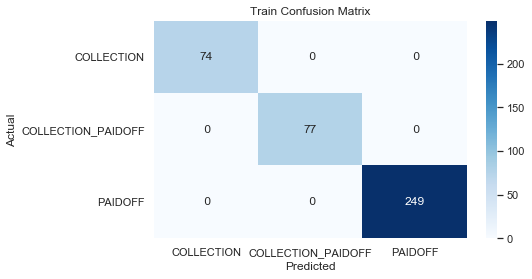

In [116]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix :

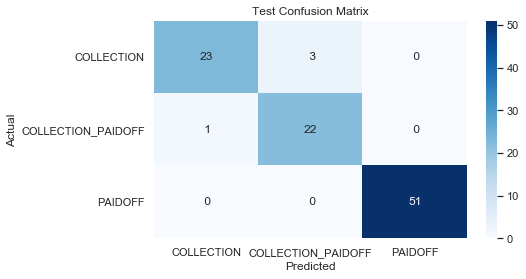

In [117]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

#### Finding F1_score

In [118]:
f1_score_train=f1_score(y_train,y_train_pred_RF,average=None)
f1_score_test=f1_score(y_test,y_test_pred_RF,average=None)
print("Training F1_score is :",f1_score_train)
print("Testing F1_score is :",f1_score_test)

Training F1_score is : [1. 1. 1.]
Testing F1_score is : [0.92       0.91666667 1.        ]


#### Saving the model for future purpose

In [119]:
joblib.dump(RF_clf_modified,'Random_Forest.pkl')

['Random_Forest.pkl']

## Building Support Vectors Machines(SVM)

### Hyperparameter tuning using Randomizedsearchcv

In [120]:
from sklearn.svm import SVC
# Assigning values to the parameters
C=[10**-4,10**-3,10**-2,10**-1,1,10,100,1000]
Gamma=[10**-4,10**-3,10**-2,10**-1,1,10,100,1000]
params_grid=dict(C=C,gamma=Gamma)
params_grid

{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [121]:
# Estimator
svm=SVC(kernel='rbf',class_weight='balanced',random_state=3)

In [122]:
# Building RandomizedsSearchCV

svm_RandomCV=RandomizedSearchCV(svm,params_grid,cv=10,n_iter=100,scoring='accuracy',n_jobs=-1)
svm_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight='balanced', coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=3,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

#### Finding best parameters :

In [123]:
svm_RandomCV.best_params_

{'gamma': 0.001, 'C': 100}

### Building Support Vectors Machines using best parameters

Note:Since SVM is distance based algorithm,we need to use the standardized data

In [124]:
svm=SVC(C=100,gamma=0.001,class_weight='balanced',random_state=3,kernel='rbf')
svm.fit(X_train_std,y_train)
y_pred_train_svm=svm.predict(X_train_std)
y_pred_test_svm=svm.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_pred_train_svm))
print("The Test Accuracy is :",accuracy_score(y_test,y_pred_test_svm))

The Training Accuracy is : 0.855
The Test Accuracy is : 0.8


### Plotting Confusion Matrices

In [125]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_pred_train_svm)
Test_Confusion_Matrix=confusion_matrix(y_test,y_pred_test_svm)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusing Matrix :

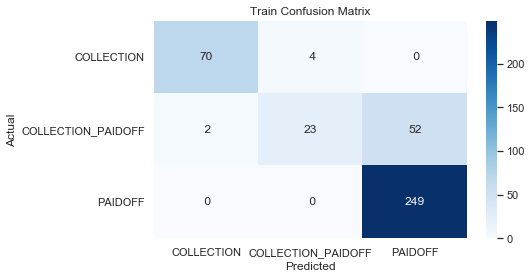

In [126]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix :

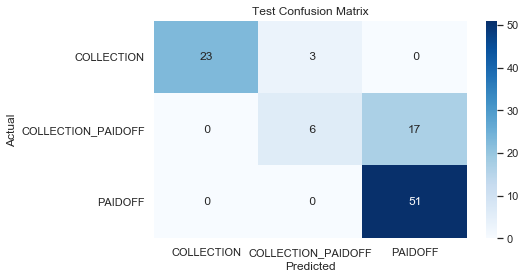

In [127]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

#### Finding F1_score :

In [128]:
f1_score_train=f1_score(y_train,y_pred_train_svm,average=None)
f1_score_test=f1_score(y_test,y_pred_test_svm,average=None)
print("Training F1_score is :",f1_score_train)
print("Testing F1_score is :",f1_score_test)

Training F1_score is : [0.95890411 0.44230769 0.90545455]
Testing F1_score is : [0.93877551 0.375      0.85714286]


#### Saving the model for future purpose

In [129]:
joblib.dump(svm,'SVM.pkl')

['SVM.pkl']

## Comparing the performance of models using Pretty Table

In [134]:
from prettytable import PrettyTable
x=PrettyTable()

In [135]:
x.field_names=['Model_Name','Regularization','Traing_Acc','Test_Acc']

In [136]:
x.add_row(['KNN','NA',0.90*100,0.81*100])
x.add_row(['Logistic_Regression','l1',0.9775*100,0.97*100])
x.add_row(['Logistic_Regression','l2',0.9775*100,0.95*100])
x.add_row(['Decision Tree','NA',0.9725*100,0.95*100])
x.add_row(['Random_Forest','NA',0.9875*100,0.96*100])
x.add_row(['SVM','NA',0.85*100,0.80*100])

In [137]:
print(x)

+---------------------+----------------+------------+----------+
|      Model_Name     | Regularization | Traing_Acc | Test_Acc |
+---------------------+----------------+------------+----------+
|         KNN         |       NA       |    90.0    |   81.0   |
| Logistic_Regression |       l1       |   97.75    |   97.0   |
| Logistic_Regression |       l2       |   97.75    |   95.0   |
|    Decision Tree    |       NA       |   97.25    |   95.0   |
|    Random_Forest    |       NA       |   98.75    |   96.0   |
|         SVM         |       NA       |    85.0    |   80.0   |
+---------------------+----------------+------------+----------+


## Conclusions :

From the Pretty table,we can see that the <b>Random Forest</b> is the best model.Therefore,we can deploy Random Forest model in production.